In [1]:
## Reinforcment learning for Heteroclinic Transfer ##

## import libraries ##
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import time
import random
import math
import copy
import os
import tensorflow as tf
from scipy.integrate import solve_ivp
import pandas as pd

2023-06-23 12:46:58.274394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define the equations of motion for the CRTBP
def crtbp_equations(t, y, mu):
    x, y, vx, vy = y
    
    r1 = np.sqrt((x + mu) ** 2 + y ** 2)
    r2 = np.sqrt((x - 1 + mu) ** 2 + y ** 2)
    
    x_double_dot = 2 * vy + x - ((1 - mu) * (x + mu)) / r1 ** 3 - (mu * (x - 1 + mu)) / r2 ** 3
    y_double_dot = -2 * vx + y - ((1 - mu) * y) / r1 ** 3 - (mu * y) / r2 ** 3
    
    return [vx, vy, x_double_dot, y_double_dot]

In [17]:
initial_conditions = [0.81553, -6.7992e-05, 9.6142e-05, 0.21151]
mu = 0.0121505856
t_span = [0, 7]
solution = solve_ivp(lambda t, y: crtbp_equations(t, y, mu), t_span, initial_conditions, method='RK45',
                         atol = 0.00001, rtol = 0.00001, max_step=0.001)

In [18]:
x = solution.y[0]
y = solution.y[1]

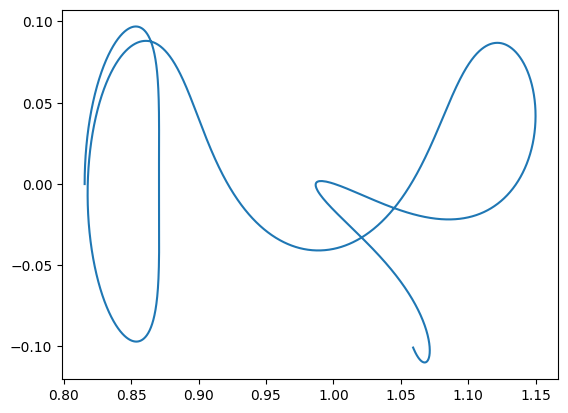

In [19]:
plt.plot(x, y)
plt.show()

In [3]:
a = pd.read_csv('all.csv', header=None)
a.head

<bound method NDFrame.head of             0         1  2         3        4  5
0     0.87018 -0.059444  0 -0.010472 -0.17514  0
1     0.87018 -0.059540  0 -0.010536 -0.17494  0
2     0.87017 -0.059636  0 -0.010600 -0.17474  0
3     0.87017 -0.059732  0 -0.010664 -0.17454  0
4     0.87016 -0.059828  0 -0.010728 -0.17434  0
...       ...       ... ..       ...      ... ..
9995  1.11730 -0.054483  0 -0.008870  0.15197  0
9996  1.11730 -0.054400  0 -0.008826  0.15210  0
9997  1.11730 -0.054316  0 -0.008781  0.15223  0
9998  1.11730 -0.054233  0 -0.008736  0.15236  0
9999  1.11720 -0.054149  0 -0.008692  0.15250  0

[10000 rows x 6 columns]>

In [4]:
states = a.to_numpy()

In [6]:
states.shape

(10000, 6)

In [12]:
x = states[:, 0]
y = states[:, 1]

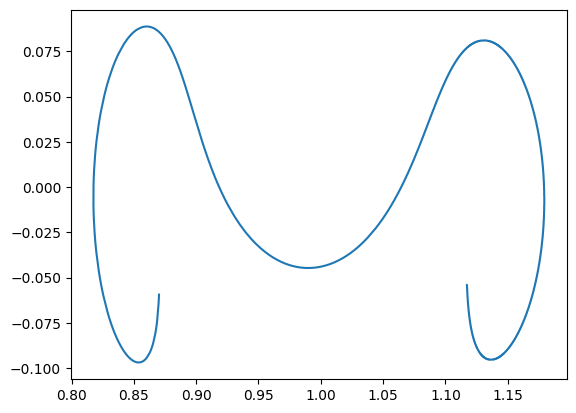

In [13]:
plt.plot(x, y)